In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
def simplePie(data, column, plot=True, sort=True, split=False):
    if (not split):
        temp = data[column].value_counts()
    else:
        temp = pd.DataFrame(np.hstack(list(map(lambda x: x.split(', '), data[column].values))))[0].value_counts()
    if(not sort):
        temp = temp.sort_index()
    if(plot):
        temp.plot.pie(autopct='%.2f')
    print(temp)

def simpleBar(data, column, plot=True, sort=True, split=False):
    if (not split):
        temp = data[column].value_counts()
    else:
        temp = pd.DataFrame(np.hstack(list(map(lambda x: x.split(', '), data[column].values))))[0].value_counts()
    if(not sort):
        temp = temp.sort_index()
    if(plot):
        ax = temp.plot.bar()
        _ = ax.bar_label(ax.containers[0])
    print(temp)

# Analysis
- **Input:** csv file all inckuded publications and corresponding data
- **Activities:** 
  - descriptive analysis

In [3]:
# import data
data = pd.read_csv('../data/dataset.csv')
data['citedByPerYear'] = data['citedBy'] / (2024 - data['year'] + .5)

## Bibliographical data

In [8]:
data[['year', 'citedBy']].agg(['mean', 'median', 'std', 'min', 'max'])

,year,citedBy
mean,2019.484848,32.219697
median,2020.000000,18.500000
std,2.914782,45.694524
min,2014.000000,0.000000
max,2024.000000,383.000000


type
conferencePaper    67
journalArticle     63
preprint            2
Name: count, dtype: int64


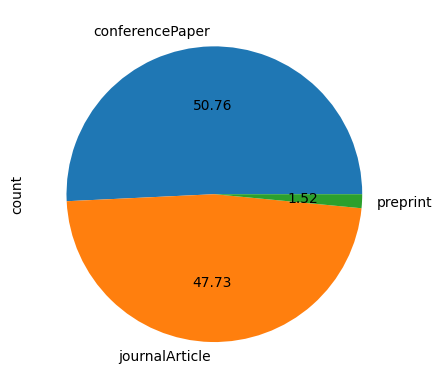

In [9]:
simplePie(data, 'type')

In [10]:
data.groupby(['type', 'quality']).size()

type             quality
conferencePaper  ?           1
                 A          35
                 B          29
journalArticle   Q1         21
                 Q2         21
                 Q3         18
                 Q4          1
preprint         -           2
dtype: int64

quality
A     35
B     29
Q2    21
Q1    21
Q3    18
-      2
Q4     1
?      1
Name: count, dtype: int64


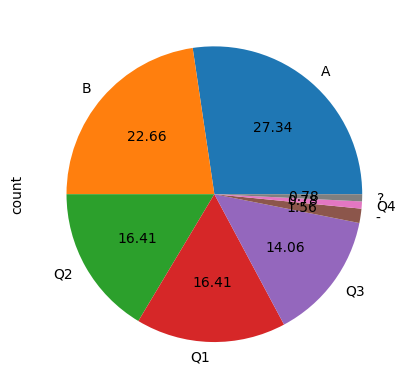

In [11]:
simplePie(data[['quality']].apply(lambda x: x), 'quality')

<Axes: xlabel='year', ylabel='count'>

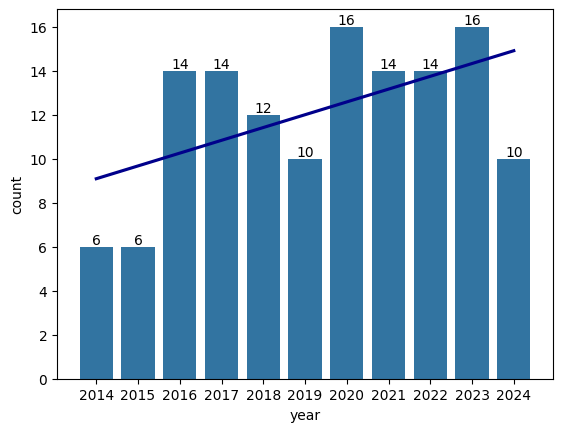

In [12]:
#simpleBar(data, 'year', sort=False)
temp = data['year'].value_counts().sort_index().reset_index()
ax = sns.barplot(temp, x="year", y="count")
ax.bar_label(ax.containers[0])
sns.regplot(temp, x=np.arange(0,len(temp.index)), y="count", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'darkblue'})

publisher
ACM                                                44
Springer Nature                                    27
IEEE                                               24
Elsevier                                           12
MDPI                                                5
Frontiers Media SA                                  4
Wiley                                               4
Taylor & Francis                                    3
IOS Press                                           2
arXiv                                               2
International Association of Online Engineering     1
SCITEPRESS                                          1
The Science and Information Organization            1
Kassel University Press GmbH                        1
River Publishers                                    1
Name: count, dtype: int64


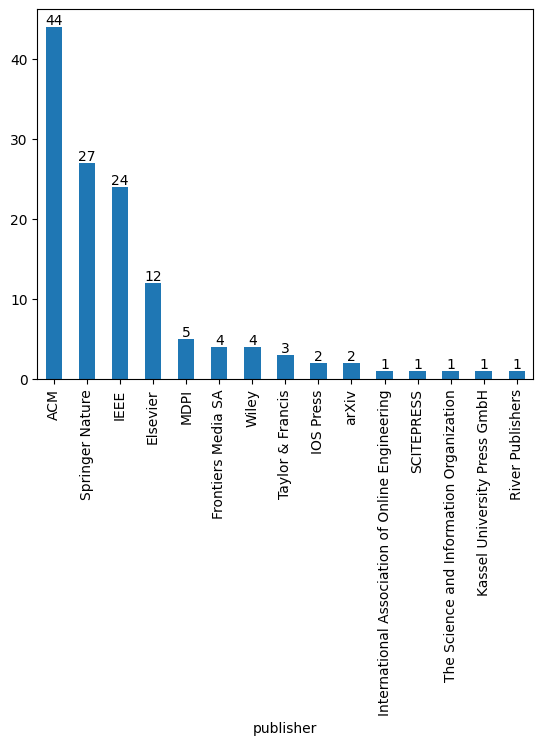

In [13]:
simpleBar(data, 'publisher')

publisher
ACM                   44
Springer Nature       27
IEEE                  24
Elsevier              12
other                  7
MDPI                   5
Frontiers Media SA     4
Wiley                  4
Taylor & Francis       3
IOS Press              2
Name: count, dtype: int64


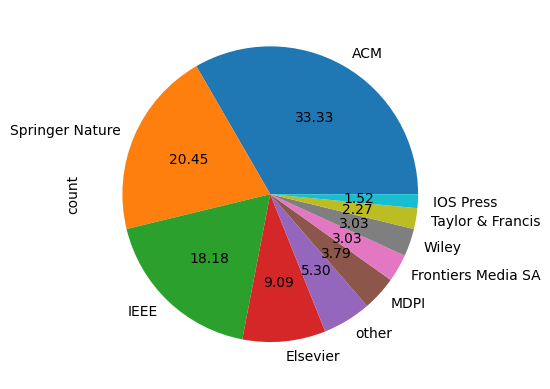

In [14]:
simplePie(data['publisher'].apply(lambda x: 'other' if x in ['arXiv',
       'International Association of Online Engineering', 'Nature Portfolio',
       'SCITEPRESS', 'The Science and Information Organization',
       'Kassel University Press GmbH', 'River Publishers'] else x).reset_index(), 'publisher')

journalShort
CHI          11
HCII          5
ICWE          4
AVI           4
UIST          4
INTERACT      4
ICSE          4
IUI           3
MOBILEHCI     3
ASE           2
ADBIS         2
SIGIR         2
SAC           2
SANER         1
HUCAPP        1
KDD           1
ESEC/FSE      1
DIS           1
IWANN         1
PICMET        1
EICS          1
ICSME         1
EASE          1
ACSOS         1
DB&IS         1
QRS           1
ICIP          1
REW           1
CVPR          1
Name: count, dtype: int64


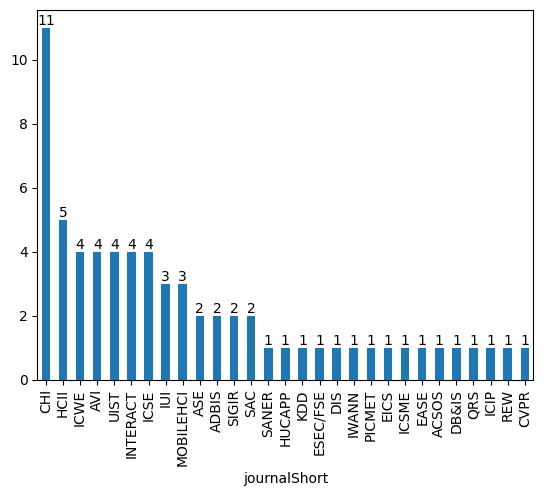

In [15]:
simpleBar(data, 'journalShort')

journal
International Journal of Human-Computer Studies                        6
IEEE Access                                                            5
IEEE Transactions on Visualization and Computer Graphics               3
Frontiers in Psychology                                                3
Universal Access in the Information Society                            3
Electronics                                                            2
IEEE Transactions on Software Engineering                              2
ACM Transactions on Interactive Intelligent Systems                    2
International Journal of Human-Computer Interaction                    1
IEEE Transactions on Affective Computing                               1
Sensors                                                                1
Computers in Human Behavior                                            1
Business and Information Systems Engineering                           1
Journal of Ambient Intelligence and Humaniz

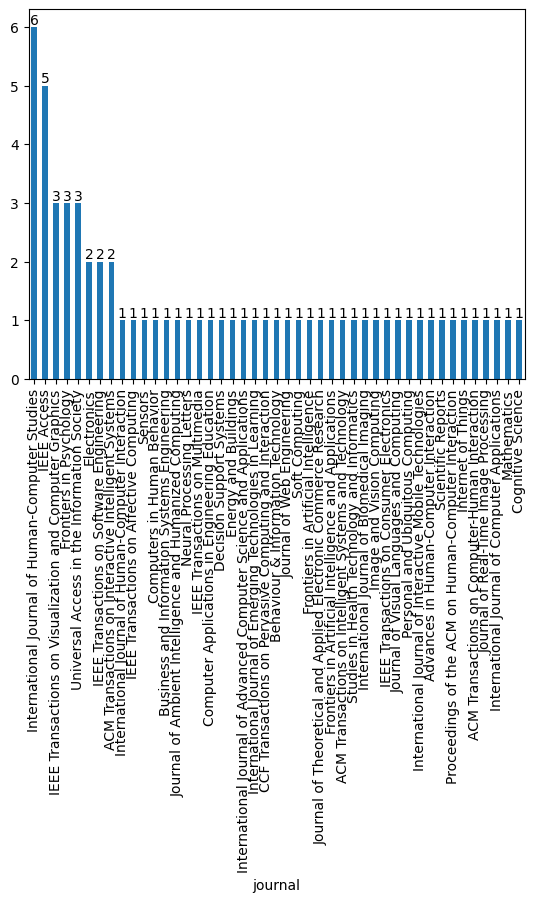

In [16]:
simpleBar(data[data.type=='journalArticle'], 'journal')

In [17]:
authors = pd.DataFrame(columns=['author'])
authors
for i in data['author'].values:
    a = i.split("; ")
    authors = pd.concat([authors, pd.DataFrame(columns=['author'], data=a)])

In [18]:
authors.author.value_counts().head(15)

author
Fan, Mingming         6
Garrido, Alejandra    5
Zhao, Jian            4
Kalja, Ahto           4
Robal, Tarmo          4
Marenkov, Jevgeni     4
Chen, Chunyang        4
Oulasvirta, Antti     4
Xu, Pingmei           3
Gaedke, Martin        3
Lanzilotti, Rosa      3
Leiva, Luis A.        3
Esposito, Andrea      3
Desolda, Giuseppe     3
Rossi, Gustavo        3
Name: count, dtype: int64

<Axes: xlabel='year'>

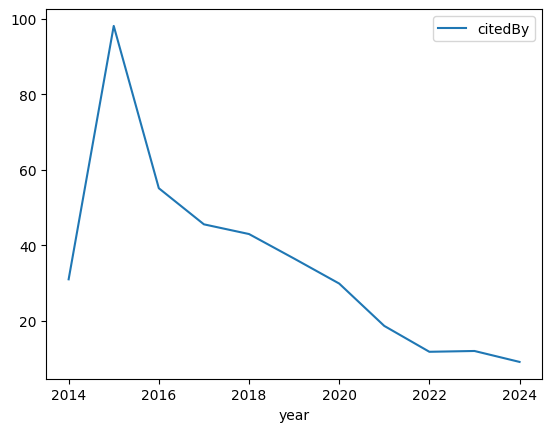

In [19]:
data[['year', 'citedBy']].groupby('year').mean().sort_index().plot()

<Axes: xlabel='year'>

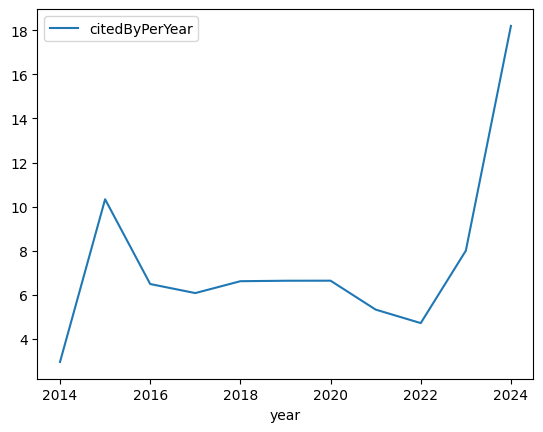

In [20]:
data[['year', 'citedByPerYear']].groupby('year').mean().sort_index().plot()

In [21]:
data.sort_values(by='citedBy', ascending=False).citedBy

111    383
7      193
13     173
52     165
74     117
      ... 
107      0
105      0
59       0
10       0
3        0
Name: citedBy, Length: 132, dtype: int64

In [22]:
data.sort_values(by='citedBy', ascending=False).head(10)[['area', 'subArea', 'data', 'citedBy', 'key']]

,area,subArea,data,citedBy,key
111,Saliency/visual importance,NaN,Video/facial expressions,383,xu2015
7,UI issue detection,NaN,Source code,193,baek2016
13,Saliency/visual importance,NaN,Screenshots/images,173,bylinskii2017
52,UX/usability attributes evaluation,user satisfaction,"User interactions, User feedback/reviews/text",165,kiseleva2016
74,UI issue detection,NaN,Source code,117,moran2018
43,UX/usability issue detection,user interaction usability problem encounter,User interactions,108,grigera2017a
50,UX/usability attributes evaluation,user effort/time,Source code,101,kaur2016
73,UX/usability attributes evaluation,Visual aesthetics,Screenshots/images,100,miniukovich2015
130,UX/usability attributes evaluation,difficulty/demand,"User interactions, physiological signals",85,frey2016
125,UX/usability attributes evaluation,difficulty/demand,gaze data,84,shojaeizadeh2019


In [23]:
data.sort_values(by='citedByPerYear', ascending=False).head(10)[['area', 'subArea', 'data', 'key']]

,area,subArea,data,key
124,UI understanding/feedback,NaN,Screenshots/images,hong2024
111,Saliency/visual importance,NaN,Video/facial expressions,xu2015
68,UX/usability attributes evaluation,user effort/time,Source code,macakoğlu2023
13,Saliency/visual importance,NaN,Screenshots/images,bylinskii2017
7,UI issue detection,NaN,Source code,baek2016
52,UX/usability attributes evaluation,user satisfaction,"User interactions, User feedback/reviews/text",kiseleva2016
57,UX/usability attributes evaluation,user engagement,User interactions,kumar2023
120,UI understanding/feedback,NaN,Screenshots/images,li2023
67,UI issue detection,NaN,Screenshots/images,liu2023
74,UI issue detection,NaN,Source code,moran2018


## Word clouds (abstracts, keywords)

In [24]:
keywords = []

for item in data['keywords']:
    if(pd.notnull(item)):
        keys = item.split('; ')
        keys = list(map(lambda x: x.lower(), keys))
        keywords += keys

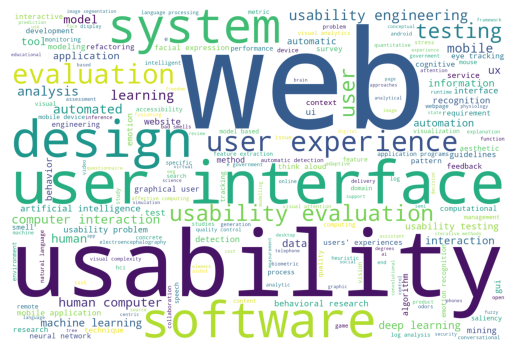

In [25]:
wc = WordCloud(background_color='white', width = 1800, height = 1200, collocation_threshold=30)
wc.generate(' '.join(keywords))
plt.axis("off")
plt.imshow(wc)

In [26]:
wc.to_file('keyword-cloud.png')

In [27]:
# todo abstract word counts
abstracts = ''

for item in data['abstract']:
    if(pd.notnull(item)):
        abstracts += item + ' '

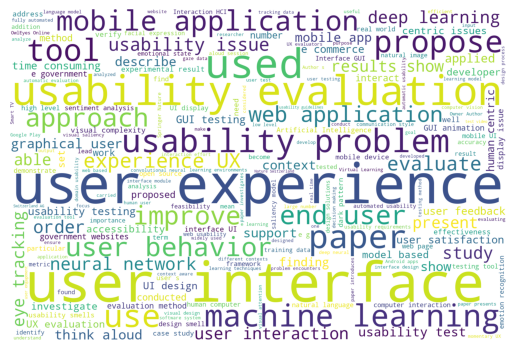

In [28]:
wc = WordCloud(background_color='white', width = 1800, height = 1200, collocation_threshold=2)
wc.generate(abstracts)
plt.axis("off")
plt.imshow(wc)

In [29]:
wc.to_file('abstract-cloud.png')

## Data extraction data

### Area

In [30]:
temp = data[['area', 'subArea', 'key', 'year']].copy(deep=True)
for index, item in temp.iterrows():
    if(item.area in ['UX/usability attributes evaluation', 'UX/usability issue detection']):
        temp.loc[index, 'area'] = item.subArea

area
usability metrics (efficiency,...)              19
Emotion detection                               17
user interaction usability problem encounter    12
UI issue detection                              11
Saliency/visual importance                      10
user effort/time                                 8
topic classification                             7
Visual aesthetics                                6
guidelines evaluation                            6
UI understanding/feedback                        6
audio/visual usability problem encounter         5
Visual complexity                                5
difficulty/demand                                4
user engagement                                  4
sentiment                                        3
user satisfaction                                3
domain usability (ontology)                      2
synthetic interview                              1
feedback helpfulness                             1
user interest             

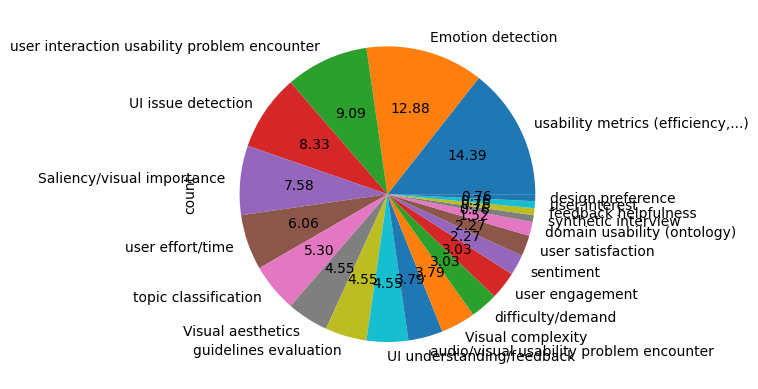

In [31]:
simplePie(temp, 'area')

area
UX/usability attributes evaluation    59
UX/usability issue detection          29
Emotion detection                     17
UI issue detection                    11
Saliency/visual importance            10
UI understanding/feedback              6
Name: count, dtype: int64


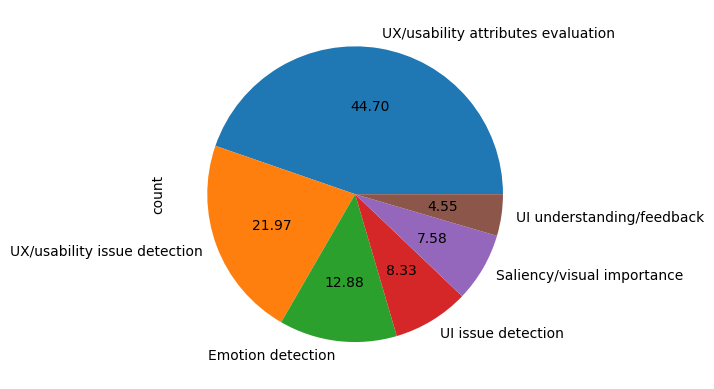

In [32]:
simplePie(data, 'area')

area
UX/usability attributes evaluation    30
UX/usability issue detection          12
Emotion detection                     10
UI issue detection                     8
UI understanding/feedback              6
Saliency/visual importance             4
Name: count, dtype: int64


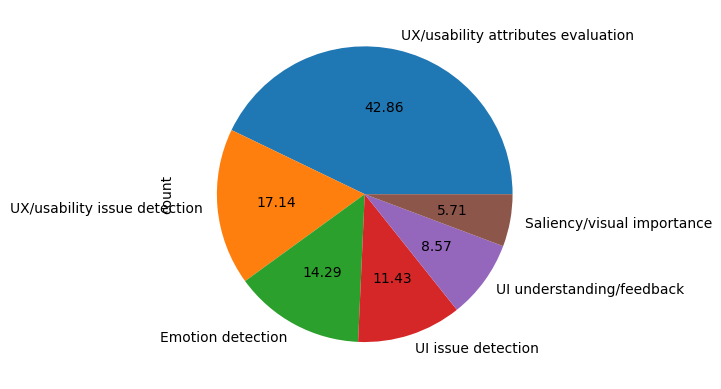

In [33]:
simplePie(data[data.year >= 2020], 'area')

area
UX/usability attributes evaluation    29
UX/usability issue detection          17
Emotion detection                      7
Saliency/visual importance             6
UI issue detection                     3
Name: count, dtype: int64


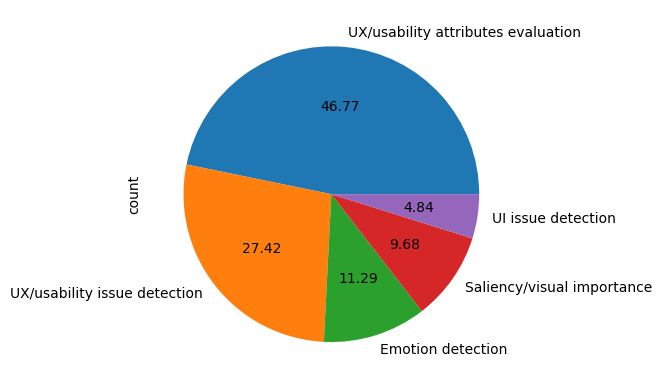

In [34]:
simplePie(data[data.year < 2020], 'area')

In [35]:
data[['area', 'citedBy', 'citedByPerYear']].groupby(['area']).agg(['mean', 'median', 'std', 'min', 'max', 'count'])

citedBy                              \
                                         mean median         std min  max   
area                                                                        
Emotion detection                   15.411765    9.0   17.560819   1   73   
Saliency/visual importance          79.900000   37.0  116.763246  10  383   
UI issue detection                  50.454545   33.0   57.315554   0  193   
UI understanding/feedback           19.000000    4.0   30.509015   0   77   
UX/usability attributes evaluation  28.152542   18.0   31.174599   0  165   
UX/usability issue detection        29.724138   25.0   25.786066   1  108   

                                         citedByPerYear                       \
                                   count           mean    median        std   
area                                                                           
Emotion detection                     17       3.047383  2.400000   2.511699   
Saliency/visual importance            10      11.162092  6.509804  11.853433   
UI issue detection                    11      10.288747  8.666667   7.584627   
UI understanding/feedback              6      29.466667  1.733333  61.462762   
UX/usability attributes evaluation    59       5.764045  4.571429   5.228758   
UX/usability issue detection          29       5.678106  5.777778   4.345567   

                                                                
                                         min         max count  
area                                                            
Emotion detection                   0.400000   11.230769    17  
Saliency/visual importance          2.000000   40.315789    10  
UI issue detection                  0.000000   22.705882    11  
UI understanding/feedback           0.000000  154.000000     6  
UX/usability attributes evaluation  0.000000   23.333333    59  
UX/usability issue detection        0.235294   15.200000    29

<Axes: ylabel='area'>

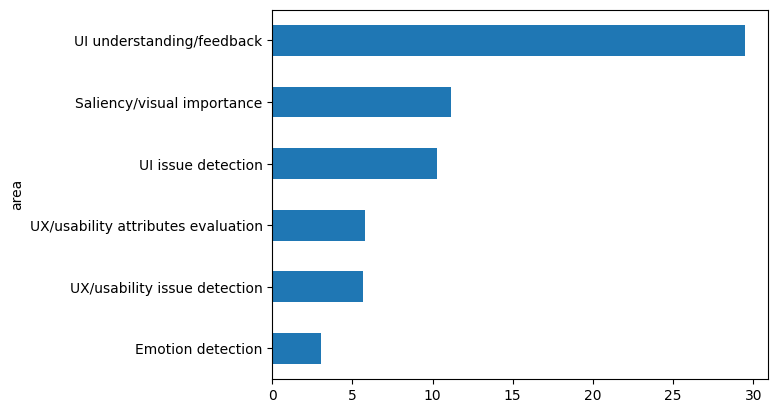

In [36]:
data[['area', 'citedByPerYear']].groupby(['area'])['citedByPerYear'].mean().sort_values().plot.barh()

subArea
usability metrics (efficiency,...)    19
user effort/time                       8
Visual aesthetics                      6
Visual complexity                      5
difficulty/demand                      4
user engagement                        4
sentiment                              3
user satisfaction                      3
domain usability (ontology)            2
topic classification                   1
synthetic interview                    1
feedback helpfulness                   1
user interest                          1
design preference                      1
Name: count, dtype: int64


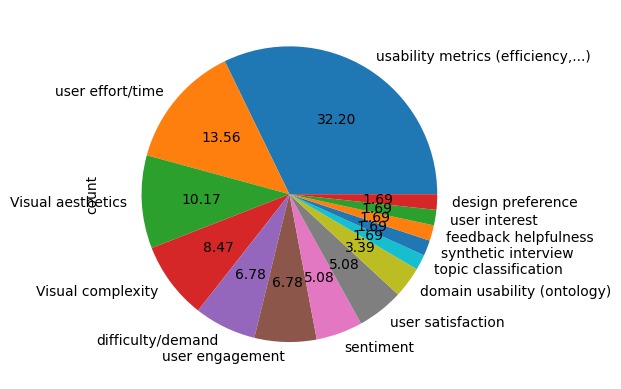

In [37]:
simplePie(data[data.area=='UX/usability attributes evaluation'], 'subArea')

subArea
user interaction usability problem encounter    12
topic classification                             6
guidelines evaluation                            6
audio/visual usability problem encounter         5
Name: count, dtype: int64


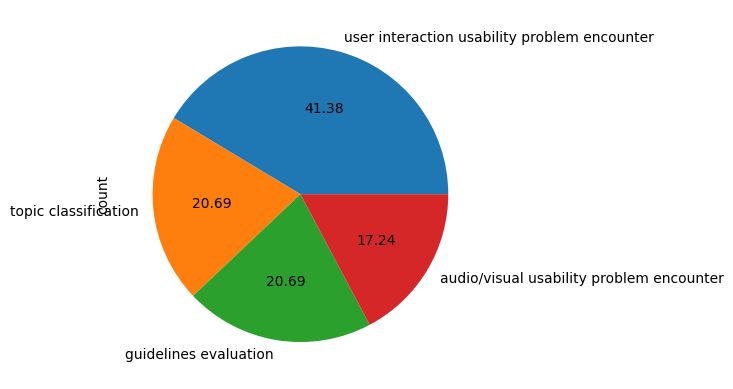

In [38]:
simplePie(data[data.area=='UX/usability issue detection'], 'subArea')

### Approach

0
User interaction analysis                  48
Computer vision                            33
Source code analysis (web/app crawling)    28
Text analysis                              18
Physiological signal analysis               8
Audio analysis                              8
Screenshot metrics                          8
Eyetracking                                 7
Conversational assistant                    4
Synthetic participants                      2
Questionnaire analysis                      1
Name: count, dtype: int64


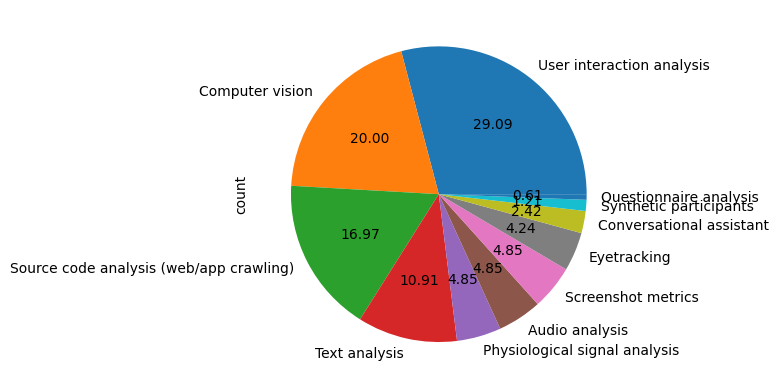

In [39]:
simplePie(data, 'approach', split=True)

0
Computer vision                            23
User interaction analysis                  21
Source code analysis (web/app crawling)    13
Text analysis                              12
Audio analysis                              7
Conversational assistant                    4
Physiological signal analysis               3
Synthetic participants                      2
Screenshot metrics                          2
Eyetracking                                 2
Questionnaire analysis                      1
Name: count, dtype: int64


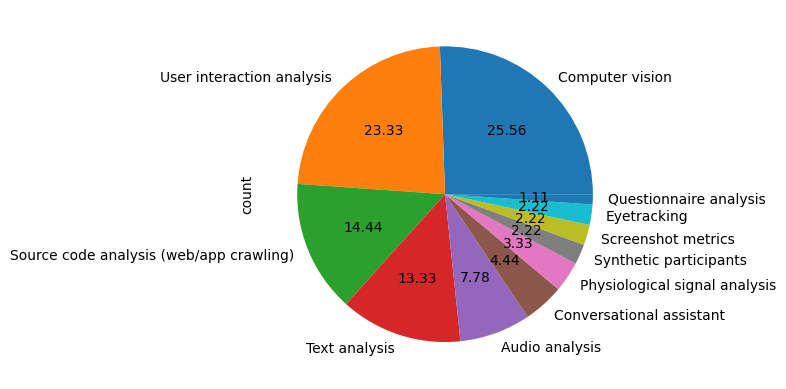

In [40]:
simplePie(data[data.year >= 2020], 'approach', split=True)

0
User interaction analysis                  27
Source code analysis (web/app crawling)    15
Computer vision                            10
Text analysis                               6
Screenshot metrics                          6
Physiological signal analysis               5
Eyetracking                                 5
Audio analysis                              1
Name: count, dtype: int64


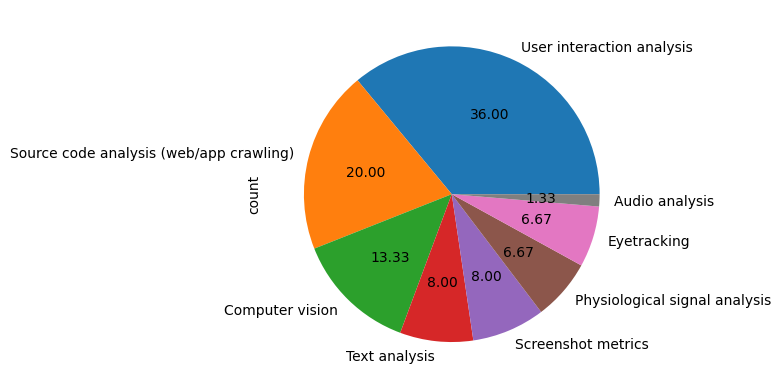

In [41]:
simplePie(data[data.year < 2020], 'approach', split=True)

In [42]:
temp = pd.DataFrame(columns=data.columns)
for index, row in data.iterrows():
    approaches = row.approach.split(', ')
    if(len(approaches) == 1):
        temp.loc[len(temp.index)] = row
    else:
        for a in approaches:
            row.approach = a
            temp.loc[len(temp.index)] = row
        
temp[['approach', 'citedBy', 'citedByPerYear']].groupby(['approach']).agg(['mean', 'median', 'std', 'min', 'max', 'count'])

citedBy                             \
                                              mean median        std min  max   
approach                                                                        
Audio analysis                              19.125   20.0  11.076842   6   38   
Computer vision                          36.121212   15.0  70.021317   0  383   
Conversational assistant                      21.0    3.0  37.345236   1   77   
Eyetracking                              39.571429   38.0  26.126979   4   84   
Physiological signal analysis               20.875    7.5  28.477748   1   85   
Questionnaire analysis                        19.0   19.0        NaN  19   19   
Screenshot metrics                          34.875   29.5  31.912548   0  100   
Source code analysis (web/app crawling)  31.678571   17.0  42.469208   0  193   
Synthetic participants                         5.5    5.5   2.121320   4    7   
Text analysis                            33.111111   20.5  40.651878   0  165   
User interaction analysis                27.479167   18.0  31.223961   0  165   

                                              citedByPerYear            \
                                        count           mean    median   
approach                                                                 
Audio analysis                              8       7.565873  5.777778   
Computer vision                            33       7.871218       4.8   
Conversational assistant                    4           41.0       4.0   
Eyetracking                                 7       6.990622  6.533333   
Physiological signal analysis               8       3.120545  1.747253   
Questionnaire analysis                      1       5.428571  5.428571   
Screenshot metrics                          8       5.387468  5.307692   
Source code analysis (web/app crawling)    28        5.68052  2.961905   
Synthetic participants                      2       2.733333  2.733333   
Text analysis                              18       7.176879  6.688889   
User interaction analysis                  48       5.233225  3.714286   

                                                                               
                                               std       min        max count  
approach                                                                       
Audio analysis                            5.367604       2.4       16.0     8  
Computer vision                           8.384923       0.0  40.315789    33  
Conversational assistant                 75.356928       2.0      154.0     4  
Eyetracking                               4.468388  0.533333  15.272727     7  
Physiological signal analysis             3.322941       0.4       10.0     8  
Questionnaire analysis                         NaN  5.428571   5.428571     1  
Screenshot metrics                        3.319713       0.0  10.526316     8  
Source code analysis (web/app crawling)   6.513742       0.0  23.333333    28  
Synthetic participants                    0.094281  2.666667        2.8     2  
Text analysis                             5.500407       0.0  19.411765    18  
User interaction analysis                 4.949526       0.0  19.411765    48

In [43]:
temp[['area', 'approach']].value_counts().unstack().fillna(0).to_clipboard()

<Axes: ylabel='approach'>

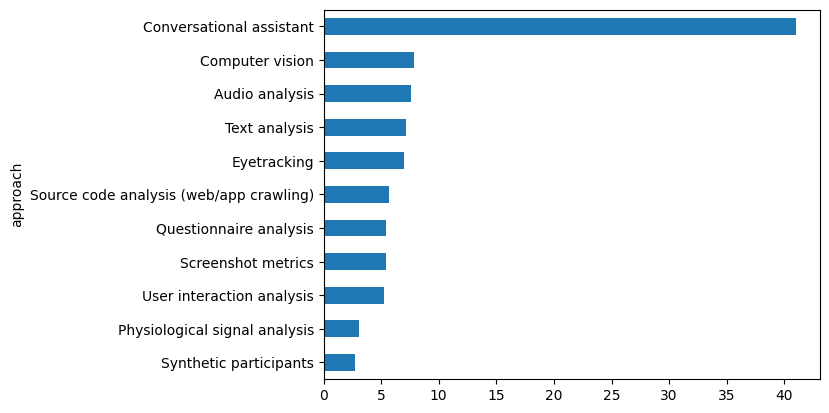

In [44]:
temp[['approach', 'citedByPerYear']].groupby('approach')['citedByPerYear'].mean().sort_values().plot.barh()

### AI use

In [45]:
temp = pd.DataFrame(columns=data.columns)
for index, row in data.iterrows():
    AIs = row.AI.split(', ')
    if(len(AIs) == 1):
        temp.loc[len(temp.index)] = row
    else:
        for a in AIs:
            row.AI = a
            temp.loc[len(temp.index)] = row

0
none                47
deep learning       40
machine learning    39
NLP                 10
New LMs              9
Name: count, dtype: int64


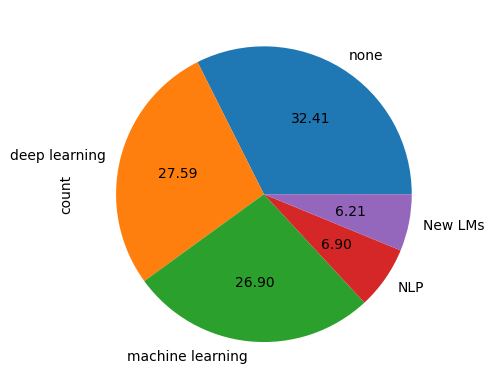

In [46]:
simplePie(data, 'AI', split=True)

AIsub
descriptive metrics/visualizations    23
metrics + rule-based                  16
behavior patterns                      5
test execution                         3
Name: count, dtype: int64


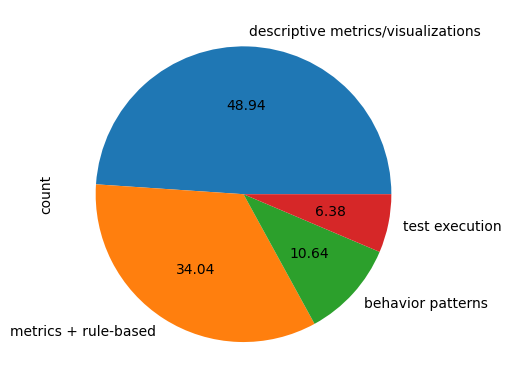

In [47]:
simplePie(data[data.AI=='none'], 'AIsub')

AIsub
LLM    5
VLM    2
NLU    1
Name: count, dtype: int64


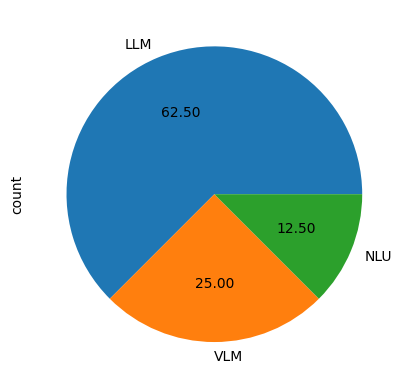

In [48]:
simplePie(data[data.AI=='New LMs'], 'AIsub')

<Axes: xlabel='year', ylabel='none'>

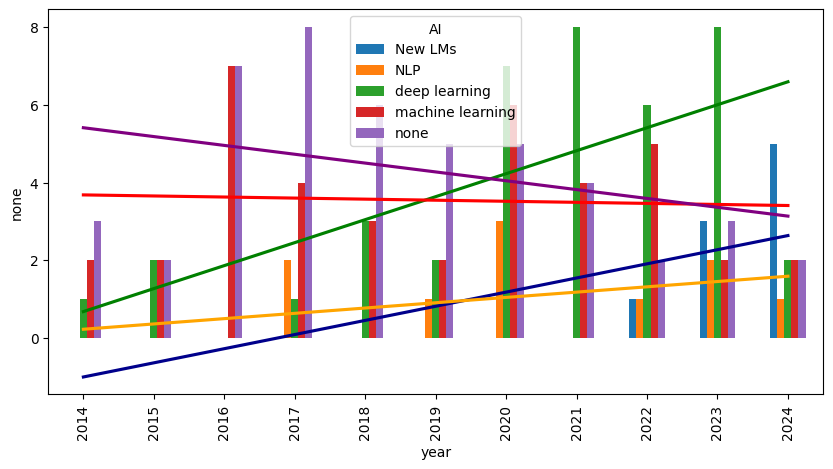

In [49]:
x = temp[['year', 'AI']].groupby(['year', 'AI']).size().unstack().fillna(0)
x[['New LMs', 'NLP', 'deep learning', 'machine learning', 'none']].plot.bar(figsize=(10, 5))
sns.regplot(x, x=np.arange(0,len(x.index)), y="New LMs", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'darkblue'})
sns.regplot(x, x=np.arange(0,len(x.index)), y="NLP", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'orange'})
sns.regplot(x, x=np.arange(0,len(x.index)), y="deep learning", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'green'})
sns.regplot(x, x=np.arange(0,len(x.index)), y="machine learning", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'red'})
sns.regplot(x, x=np.arange(0,len(x.index)), y="none", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'purple'})

In [50]:
temp[['area', 'AI']].value_counts().unstack().fillna(0).to_clipboard()

In [51]:
temp2 = pd.DataFrame(columns=data.columns)
for index, row in temp.iterrows():
    approaches = row.approach.split(', ')
    if(len(approaches) == 1):
        temp2.loc[len(temp2.index)] = row
    else:
        for a in approaches:
            row.approach = a
            temp2.loc[len(temp2.index)] = row

In [52]:
temp2[['approach', 'AI']].value_counts().unstack().fillna(0).to_clipboard()

<Axes: xlabel='None', ylabel='noAI'>

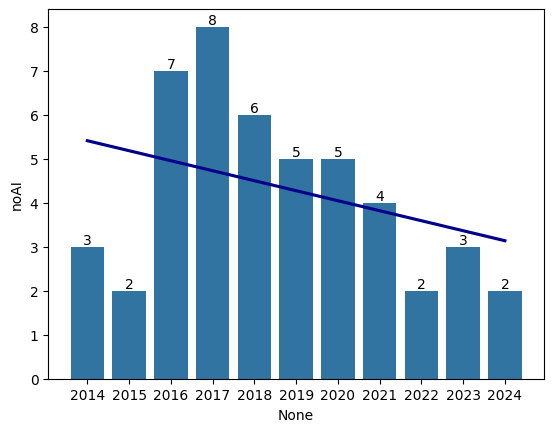

In [53]:
temp = pd.DataFrame(data={
    'noAI': data[data.AI == 'none'].groupby('year').size().values,
    'AI': data[data.AI != 'none'].groupby('year').size().values
}, index=data.year.sort_values().unique())
ax = sns.barplot(temp, x=temp.index, y="noAI")
ax.bar_label(ax.containers[0])
sns.regplot(temp, x=np.arange(0,len(temp.index)), y="noAI", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'darkblue'})

<Axes: xlabel='None', ylabel='AI'>

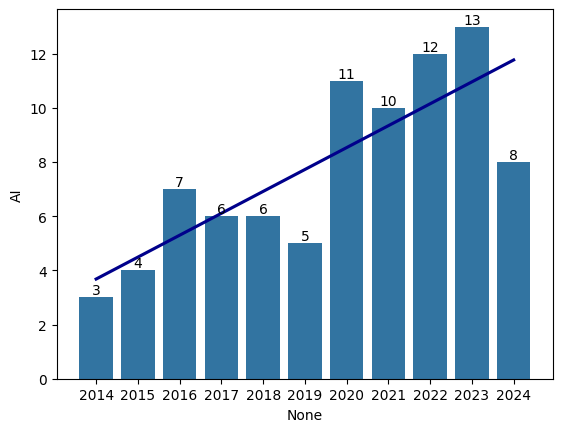

In [54]:
ax = sns.barplot(temp, x=temp.index, y="AI")
ax.bar_label(ax.containers[0])
sns.regplot(temp, x=np.arange(0,len(temp.index)), y="AI", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'darkblue'})

year
2014    3
2015    2
2016    7
2017    8
2018    6
2019    5
2020    5
2021    4
2022    2
2023    3
2024    2
Name: count, dtype: int64


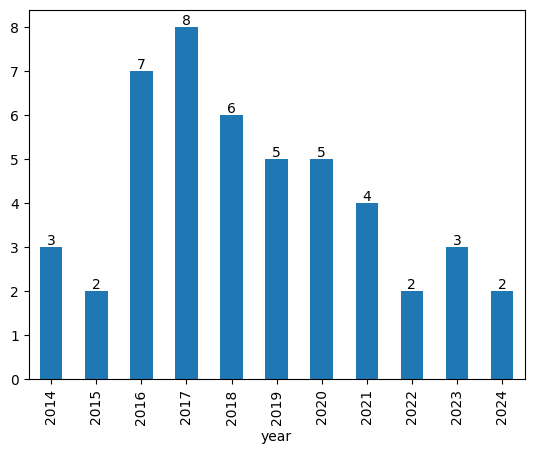

In [55]:
simpleBar(data[data.AI == 'none'], 'year', sort=False)

year
2014     3
2015     4
2016     7
2017     6
2018     6
2019     5
2020    11
2021    10
2022    12
2023    13
2024     8
Name: count, dtype: int64


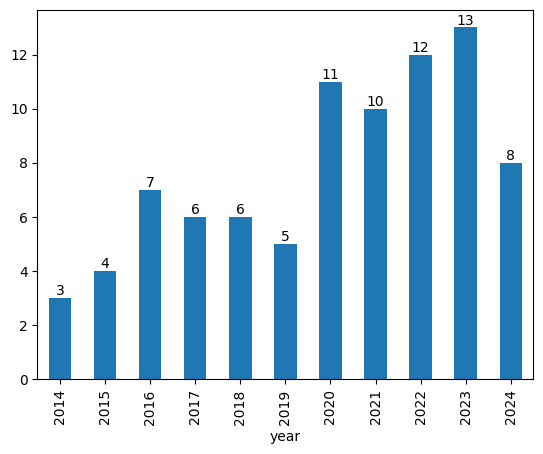

In [56]:
simpleBar(data[data.AI != 'none'], 'year', sort=False)

In [57]:
temp = pd.DataFrame(columns=data.columns)
for index, row in data.iterrows():
    AIs = row.AI.split(', ')
    if(len(AIs) == 1):
        temp.loc[len(temp.index)] = row
    else:
        for a in AIs:
            row.AI = a
            temp.loc[len(temp.index)] = row
        
temp[['AI', 'citedBy', 'citedByPerYear']].groupby(['AI']).agg(['mean', 'median', 'std', 'min', 'max', 'count'])

citedBy                                  citedByPerYear  \
                       mean median        std min  max count           mean   
AI                                                                            
NLP                    29.1   24.0  25.383503   4   70    10       7.499394   
New LMs           13.222222    1.0  25.635804   0   77     9      20.607407   
deep learning        33.075   15.5  63.991741   0  383    40       6.713405   
machine learning  35.384615   19.0  34.047657   1  165    39       6.743604   
none              30.510638   22.0  36.311977   0  193    47       5.334207   

                                                                  
                    median        std       min        max count  
AI                                                                
NLP                    6.8   4.405845  1.111111       16.0    10  
New LMs                2.0  50.394096       0.0      154.0     9  
deep learning          4.8   7.343332       0.0  40.315789    40  
machine learning  5.777778   5.286656       0.4  19.411765    39  
none              3.066667   5.576418       0.0  23.333333    47

<Axes: xlabel='AI'>

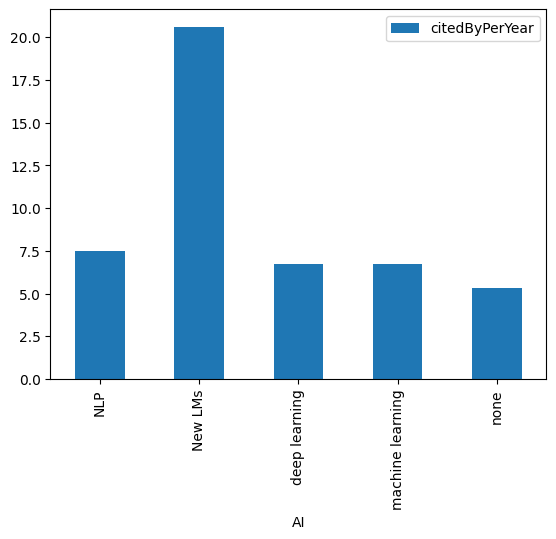

In [58]:
temp[['AI', 'citedByPerYear']].groupby(['AI']).mean().plot.bar()

area
UX/usability attributes evaluation    34
Emotion detection                     16
UX/usability issue detection          13
Saliency/visual importance             9
UI issue detection                     7
UI understanding/feedback              6
Name: count, dtype: int64


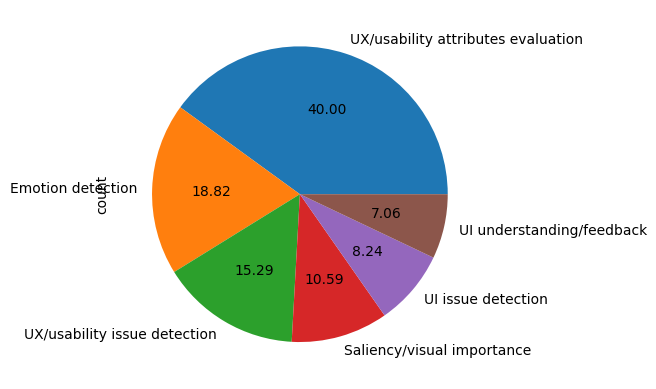

In [59]:
simplePie(data[data.AI!='none'], 'area')

0
Screenshots/images            28
User interactions             23
User feedback/reviews/text    14
Video/facial expressions      11
Audio/speech                   9
Source code                    7
physiological signals          7
gaze data                      6
User movements                 3
none                           2
Name: count, dtype: int64


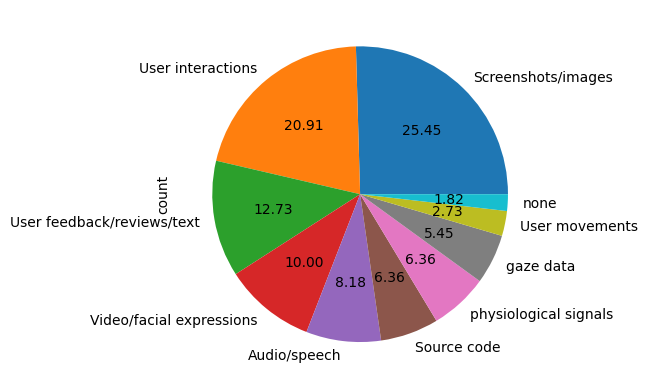

In [60]:
simplePie(data[data.AI!='none'], 'data', split=True)

0
Computer vision                            33
User interaction analysis                  24
Text analysis                              18
Audio analysis                              8
Source code analysis (web/app crawling)     7
Physiological signal analysis               7
Eyetracking                                 6
Screenshot metrics                          5
Conversational assistant                    3
Synthetic participants                      2
Questionnaire analysis                      1
Name: count, dtype: int64


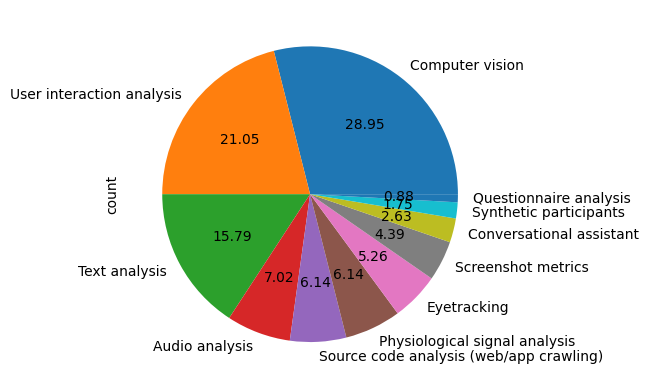

In [61]:
simplePie(data[data.AI!='none'], 'approach', split=True)

### Data

0
User interactions             47
Screenshots/images            31
Source code                   28
User feedback/reviews/text    14
Video/facial expressions      11
Audio/speech                   9
physiological signals          8
gaze data                      7
User movements                 4
none                           2
Name: count, dtype: int64


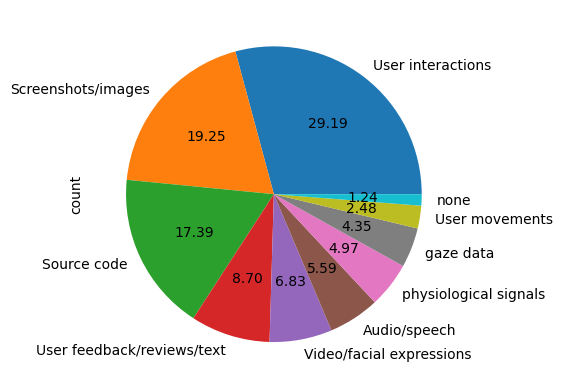

In [62]:
simplePie(data, 'data', split=True)

In [63]:
temp = pd.DataFrame(columns=data.columns)
for index, row in data.iterrows():
    datas = row.data.split(', ')
    if(len(datas) == 1):
        temp.loc[len(temp.index)] = row
    else:
        for d in datas:
            row.data = d
            temp.loc[len(temp.index)] = row
        
temp[['data', 'citedBy', 'citedByPerYear']].groupby(['data']).agg(['mean', 'median', 'std', 'min', 'max', 'count'])

citedBy                                    \
                                 mean median         std min  max count   
data                                                                      
Audio/speech                17.111111   18.0   11.994212   1   38     9   
Screenshots/images               33.0   25.0   36.251897   0  173    31   
Source code                 31.678571   17.0   42.469208   0  193    28   
User feedback/reviews/text  37.785714   19.0   44.954984   0  165    14   
User interactions            27.87234   18.0   31.447414   0  165    47   
User movements                    6.5    6.0    1.000000   6    8     4   
Video/facial expressions    47.181818   12.0  111.801447   6  383    11   
gaze data                   39.571429   38.0   26.126979   4   84     7   
none                              5.5    5.5    2.121320   4    7     2   
physiological signals          20.875    7.5   28.477748   1   85     8   

                           citedByPerYear                                 \
                                     mean    median        std       min   
data                                                                       
Audio/speech                     6.947443  5.777778   5.352745       2.0   
Screenshots/images              11.882561       6.0  27.016138       0.0   
Source code                       5.68052  2.961905   6.513742       0.0   
User feedback/reviews/text       7.018345       6.8   5.527041       0.0   
User interactions                5.372105       4.0   4.954271       0.0   
User movements                   1.543417  0.733894   1.637935  0.705882   
Video/facial expressions         8.044593  4.285714  11.552656  0.705882   
gaze data                        6.990622  6.533333   4.468388  0.533333   
none                             2.733333  2.733333   0.094281  2.666667   
physiological signals            3.120545  1.747253   3.322941       0.4   

                                             
                                  max count  
data                                         
Audio/speech                     16.0     9  
Screenshots/images              154.0    31  
Source code                 23.333333    28  
User feedback/reviews/text  19.411765    14  
User interactions           19.411765    47  
User movements                    4.0     4  
Video/facial expressions    40.315789    11  
gaze data                   15.272727     7  
none                              2.8     2  
physiological signals            10.0     8

<Axes: ylabel='data'>

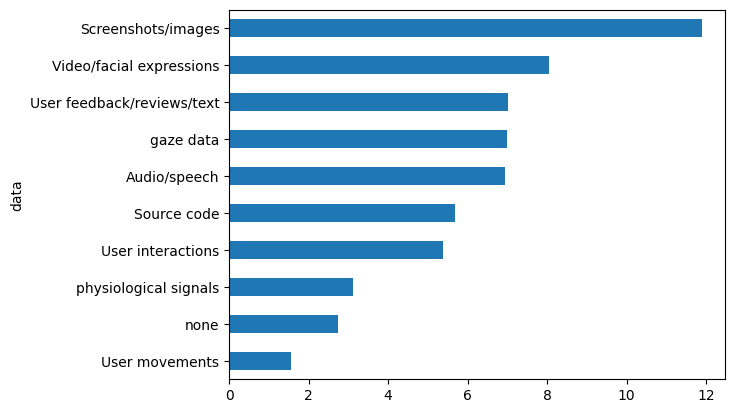

In [64]:
temp[['data', 'citedByPerYear']].groupby(['data'])['citedByPerYear'].mean().sort_values().plot.barh()

### Participants

0
yes               79
no                50
no (synthetic)     3
Name: count, dtype: int64


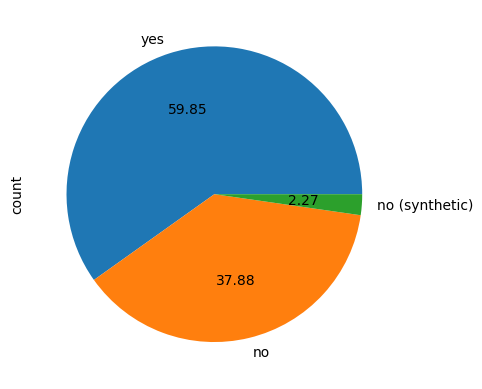

In [65]:
simplePie(data, 'participants', split=True)

<Axes: xlabel='None', ylabel='noParticipants'>

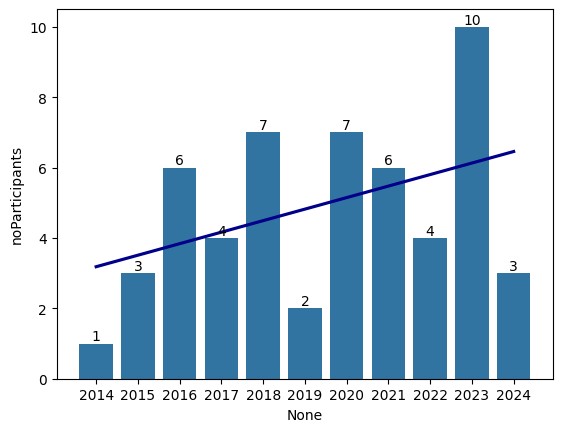

In [66]:
temp = pd.DataFrame(data={
    'noParticipants': data[data.participants != 'yes'].groupby('year').size().values,
    'participants': data[data.participants == 'yes'].groupby('year').size().values
}, index=data.year.sort_values().unique())
ax = sns.barplot(temp, x=temp.index, y="noParticipants")
ax.bar_label(ax.containers[0])
sns.regplot(temp, x=np.arange(0,len(temp.index)), y="noParticipants", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'darkblue'})

<Axes: xlabel='None', ylabel='participants'>

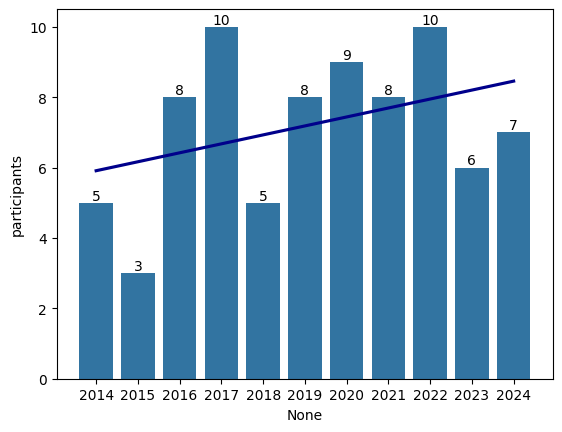

In [67]:
ax = sns.barplot(temp, x=temp.index, y="participants")
ax.bar_label(ax.containers[0])
sns.regplot(temp, x=np.arange(0,len(temp.index)), y="participants", ci=None, scatter_kws={'alpha':0}, line_kws={'color':'darkblue'})

year
2014     5
2015     3
2016     8
2017    10
2018     5
2019     8
2020     9
2021     8
2022    10
2023     6
2024     7
Name: count, dtype: int64


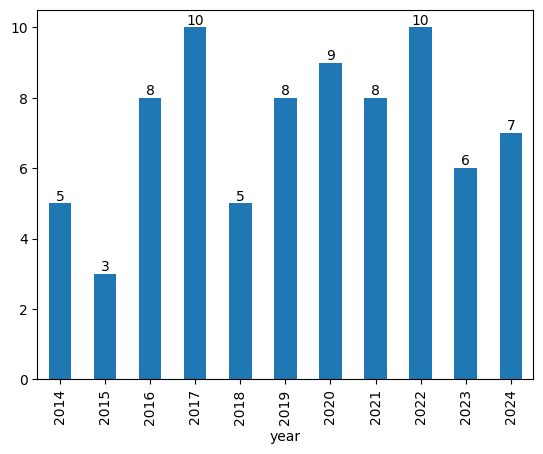

In [68]:
simpleBar(data[data.participants == 'yes'], 'year', sort=False)

year
2014     1
2015     3
2016     6
2017     4
2018     7
2019     2
2020     7
2021     6
2022     4
2023    10
2024     3
Name: count, dtype: int64


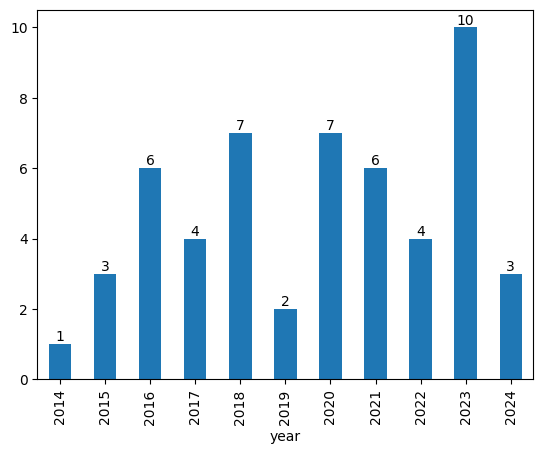

In [69]:
simpleBar(data[data.participants != 'yes'], 'year', sort=False)

0
UX/usability attributes evaluation    23
UI issue detection                    11
Saliency/visual importance             7
UI understanding/feedback              6
UX/usability issue detection           6
Name: count, dtype: int64


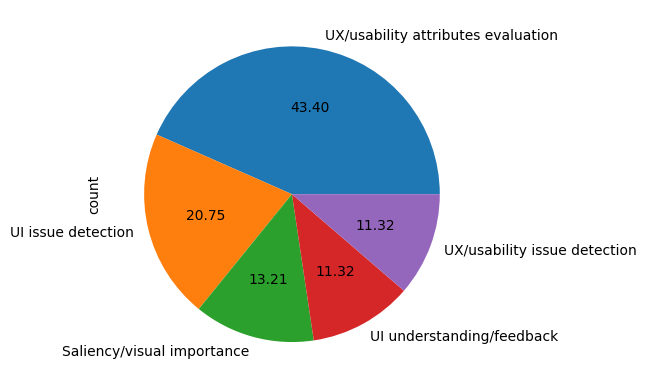

In [70]:
simplePie(data[data.participants != 'yes'], 'area', split=True)

0
Source code analysis (web/app crawling)    24
Computer vision                            22
Screenshot metrics                          8
Synthetic participants                      2
Conversational assistant                    1
Name: count, dtype: int64


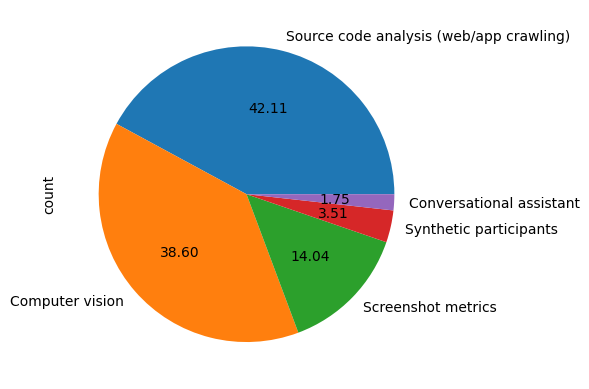

In [71]:
simplePie(data[data.participants != 'yes'], 'approach', split=True)